# <center>Exploratory Data Analysis</center>

<br>
<br>
<p>This Capstone Project consist in the development of a Sentiment Analysis Algorithm for tweets classification. The dataset selected for the present project was found in the Dataset section of Kaggle, but the original source is Sentiment140 (http://help.sentiment140.com/for-students/). We will use the dataset link provided in that web page.</p>
<p>Citation: Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.</p>
<br>
<p>First of all, let's get the data from the remote location.</p>
<br>
<br>

In [6]:
!wget -O trainingandtestdata.zip http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
print('unziping ...')
!unzip -o -j trainingandtestdata.zip

--2019-05-04 21:57:53--  http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip [following]
--2019-05-04 21:57:53--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip’

100%[======================================>] 81,363,704  11.1MB/s   in 7.7s   

2019-05-04 21:58:01 (10.0 MB/s) - ‘trainingandtestdata.zip’ saved [81363704/81363704]

unziping ...
Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


<br>
<br>
<p>The downloaded file contains two dataset, one labeled as "training" and the other labeled as "test". Now, let's import some necessary libraries and explore the training dataset 
(training.1600000.processed.noemoticon.csv)</p>
<br>
<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("training.1600000.processed.noemoticon.csv", header=None, encoding='ISO-8859-1')
print(data.shape)
data.head()

(1600000, 6)


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


<br>
<br>
<p>Here we have 1.6 million tweets and 6 diferent value columns. We need to know if there are missing values.</p>
<br>
<br>

In [3]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

<br>
<br>
<p>There are no missing values in the training dataset. Now, according with the documentation present in the data source, there are three possible categories to label the tweets:</p>
<p></p>
<p><ul><li>0 = negative<li>2 = neutral<li>4 = positive</ul></p>
<p></p>
<p>The label values are stored in the 0-index column. Let's see the distribution of this categories in the dataset.</p>
<br>
<br>

In [4]:
data.groupby(data.iloc[:, 0]).count()

,0,1,2,3,4,5
0,,,,,,
0,800000,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000,800000


<br>
<br>
<p>As we can see, there are no values for the "neutral" (2) category. The two remaining categories are equally distributed. Let's plot a graphic to see it more clearly.</p>
<br>
<br>

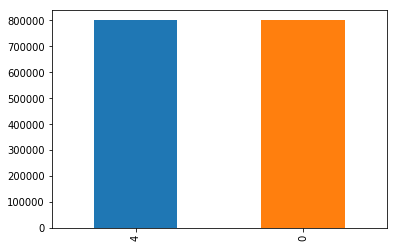

In [5]:
data.iloc[:, 0].value_counts().plot(kind="bar")

<br>
<br>
<p>It's time to explore the test dataset. We will follow the same steps described above for the training dataset.</p>
<br>
<br>

In [6]:
test = pd.read_csv("testdata.manual.2009.06.14.csv", header=None, encoding='ISO-8859-1')
print(test.shape)
test.head()

(498, 6)


,0,1,2,3,4,5
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


<br>
<br>
<p>We have here 498 tweets and the same 6 value columns. Let's see the value distribution in the label column.</p>
<br>
<br>

In [7]:
test.groupby(test.iloc[:, 0]).count()

,0,1,2,3,4,5
0,,,,,,
0,177,177,177,177,177,177
2,139,139,139,139,139,139
4,182,182,182,182,182,182


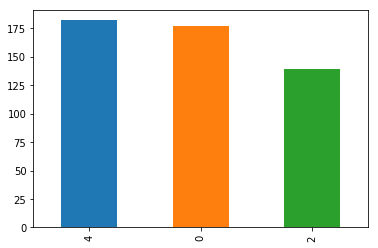

In [8]:
test.iloc[:, 0].value_counts().plot(kind="bar")

<br>
<br>
<p>As we can see, this dataset has values for the "neutral" (2) category. Beyond this, the distribution for the other two categories is very well balanced. Here concludes the data exploratory stage.</p>
<br>
<br>